In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
target_column = "output"
numerical_column = df.columns.drop(target_column)

In [5]:
scaler = MinMaxScaler()

In [6]:
output_rows = df[target_column]

In [7]:
df.drop(target_column,axis=1,inplace=True)

In [8]:
scaler.fit(df)
t_df = scaler.transform(df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state= 0)

In [10]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))


X_train: (227, 13)
y_train: (227,)
X_test: (76, 13)
y_test: (76,)


In [11]:
basic_model = Sequential()

In [12]:
basic_model.add(Dense(units = 16 , activation = 'relu', input_shape = (13,)))
# basic_model.add(Dense(units = 32 , activation = 'gelu', input_shape = (13,)))
basic_model.add(Dense(1, activation = 'sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics=["accuracy"])

In [14]:
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5325 - loss: 0.7177  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5430 - loss: 0.6927 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 0.6790 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.6682 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.6517 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6965 - loss: 0.6531 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7268 - loss: 0.6389 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.6322 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.6358 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7758 - loss: 0.6163 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.6186 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7544 - loss: 0.6159 


In [15]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8115 - loss: 0.4039 
[0.4094768166542053, 0.8026315569877625]
Loss =  0.4094768166542053
Accuracy =  0.8026315569877625


In [16]:
predicted = basic_model.predict(X_test)
predicted = tf.squeeze(predicted)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [17]:
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)

Accuracy: 0.803
Precision: 0.804
Recall: 0.860


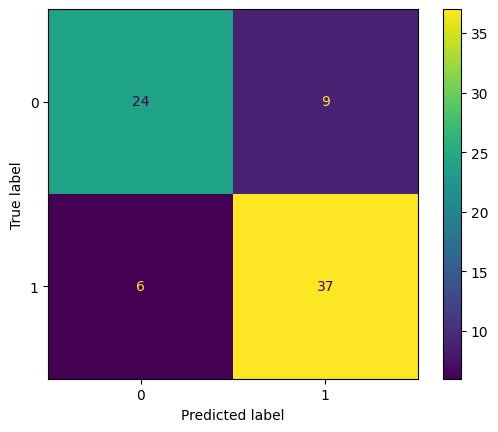

In [18]:
conf_mat = confusion_matrix(actual, predicted)

displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
# Обчислюємо метрики
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

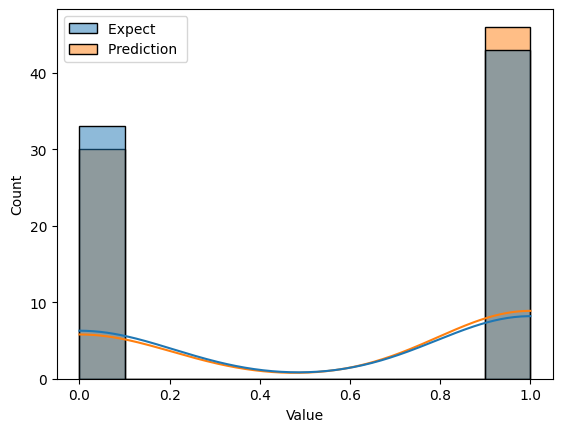

In [19]:
import seaborn as sns
df = pd.DataFrame({'Expect ': actual.flatten(), 'Prediction ': predicted.flatten()})
sns.histplot(data=df, bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()